In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
data=pd.read_csv('1_cep1_dataset.csv')
print(data.shape)

(303, 14)


In [2]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
for i in data.columns:
    print("Number of unique values in {} \n The unique values are {}".format(i,len(data[i].unique()),data[i].unique()))

Number of unique values in age 
 The unique values are 41
Number of unique values in sex 
 The unique values are 2
Number of unique values in cp 
 The unique values are 4
Number of unique values in trestbps 
 The unique values are 49
Number of unique values in chol 
 The unique values are 152
Number of unique values in fbs 
 The unique values are 2
Number of unique values in restecg 
 The unique values are 3
Number of unique values in thalach 
 The unique values are 91
Number of unique values in exang 
 The unique values are 2
Number of unique values in oldpeak 
 The unique values are 40
Number of unique values in slope 
 The unique values are 3
Number of unique values in ca 
 The unique values are 5
Number of unique values in thal 
 The unique values are 4
Number of unique values in target 
 The unique values are 2


In [10]:
n_f_c=list(data._get_numeric_data().columns)
n_f_c

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [11]:
c_f_c=list(set(data.columns)-set(data._get_numeric_data().columns))
c_f_c

[]

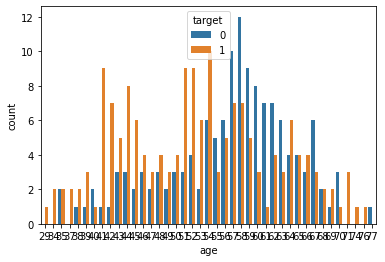

In [12]:
sns.countplot(x='age', hue='target',data=data)
plt.show()

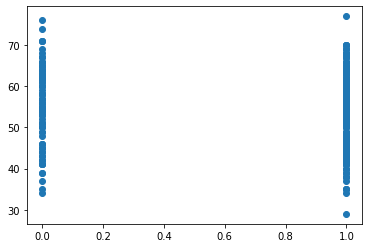

In [13]:
plt.scatter(x='sex',y='age',data=data)
plt.show()

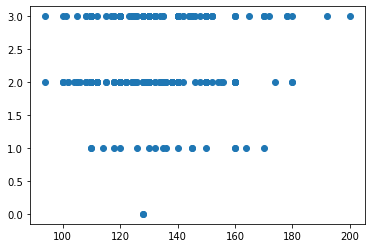

In [14]:
plt.scatter(x='trestbps',y='thal',data=data)
plt.show()

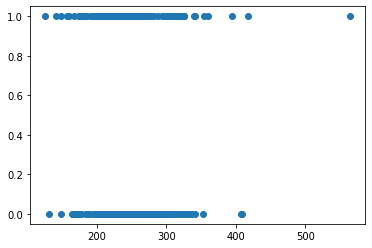

In [15]:
plt.scatter(x='chol', y='target',data=data)
plt.show()

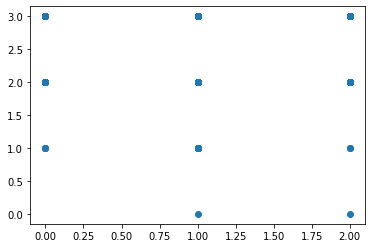

In [16]:
plt.scatter(x='slope', y='thal',data=data)
plt.show()

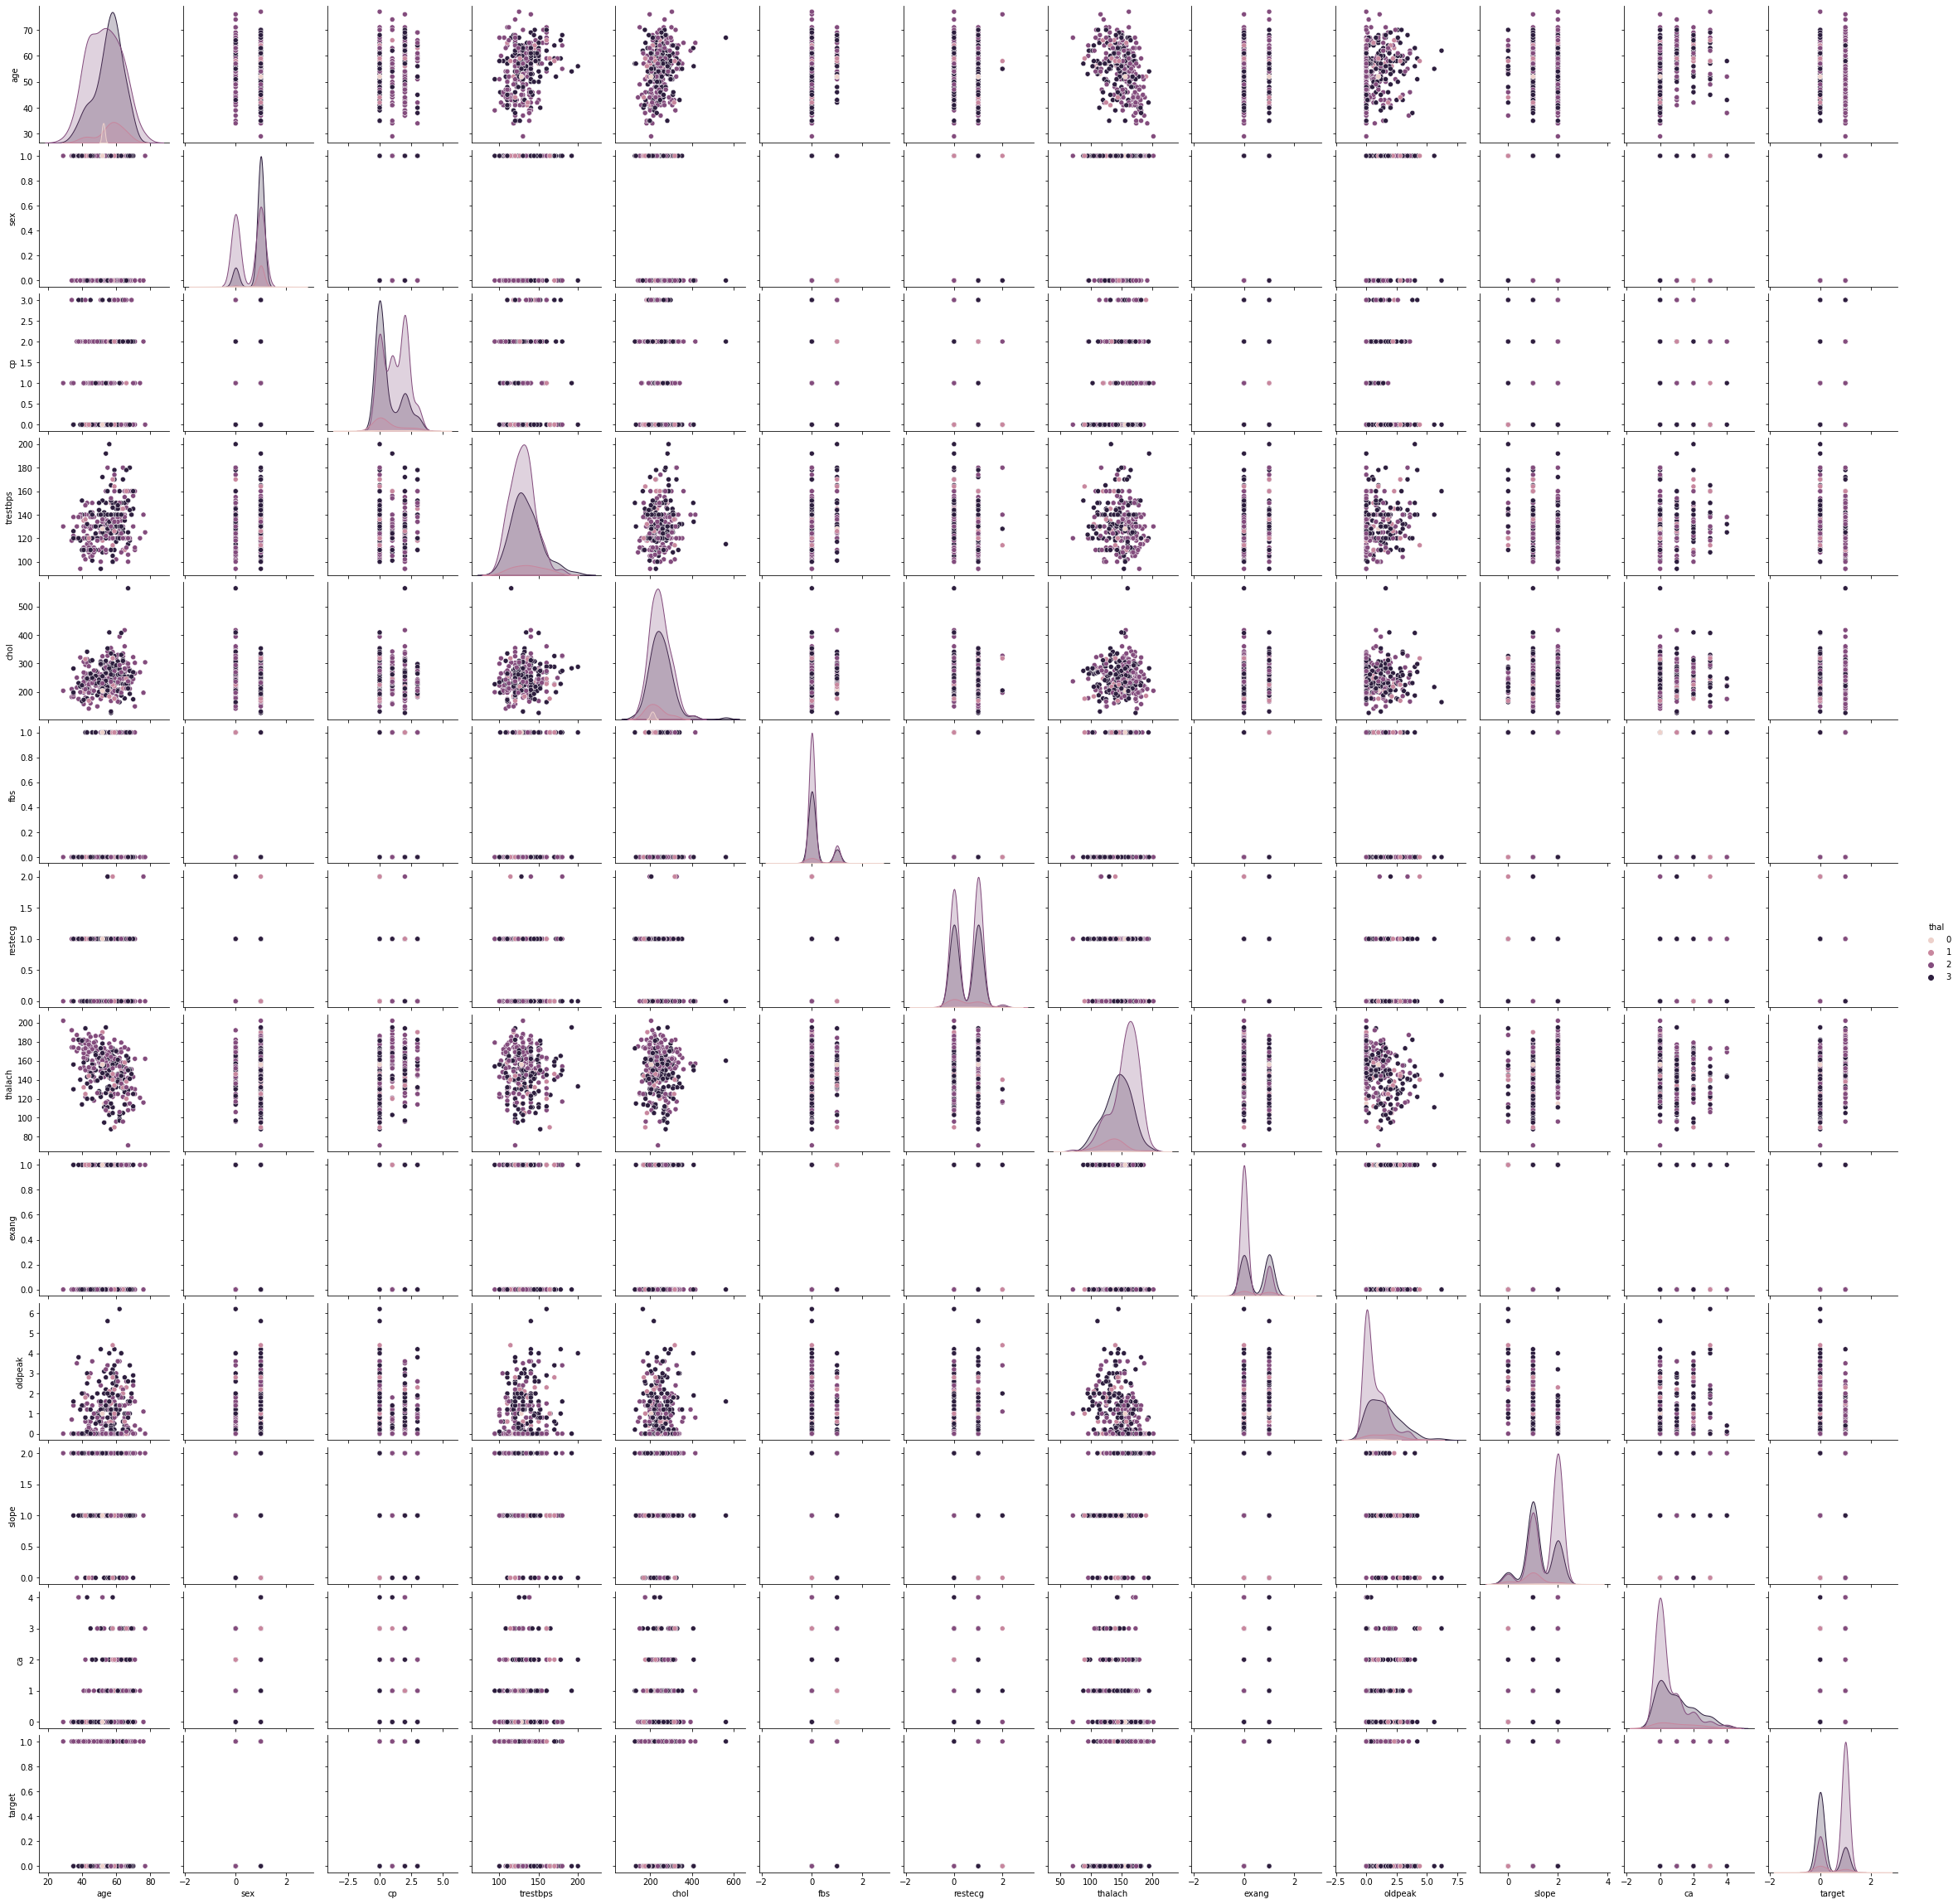

In [17]:
sns.pairplot(data,hue='thal')
plt.show()

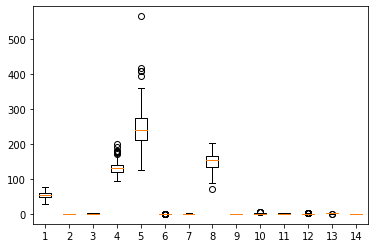

In [18]:
plt.boxplot(data)
plt.show()

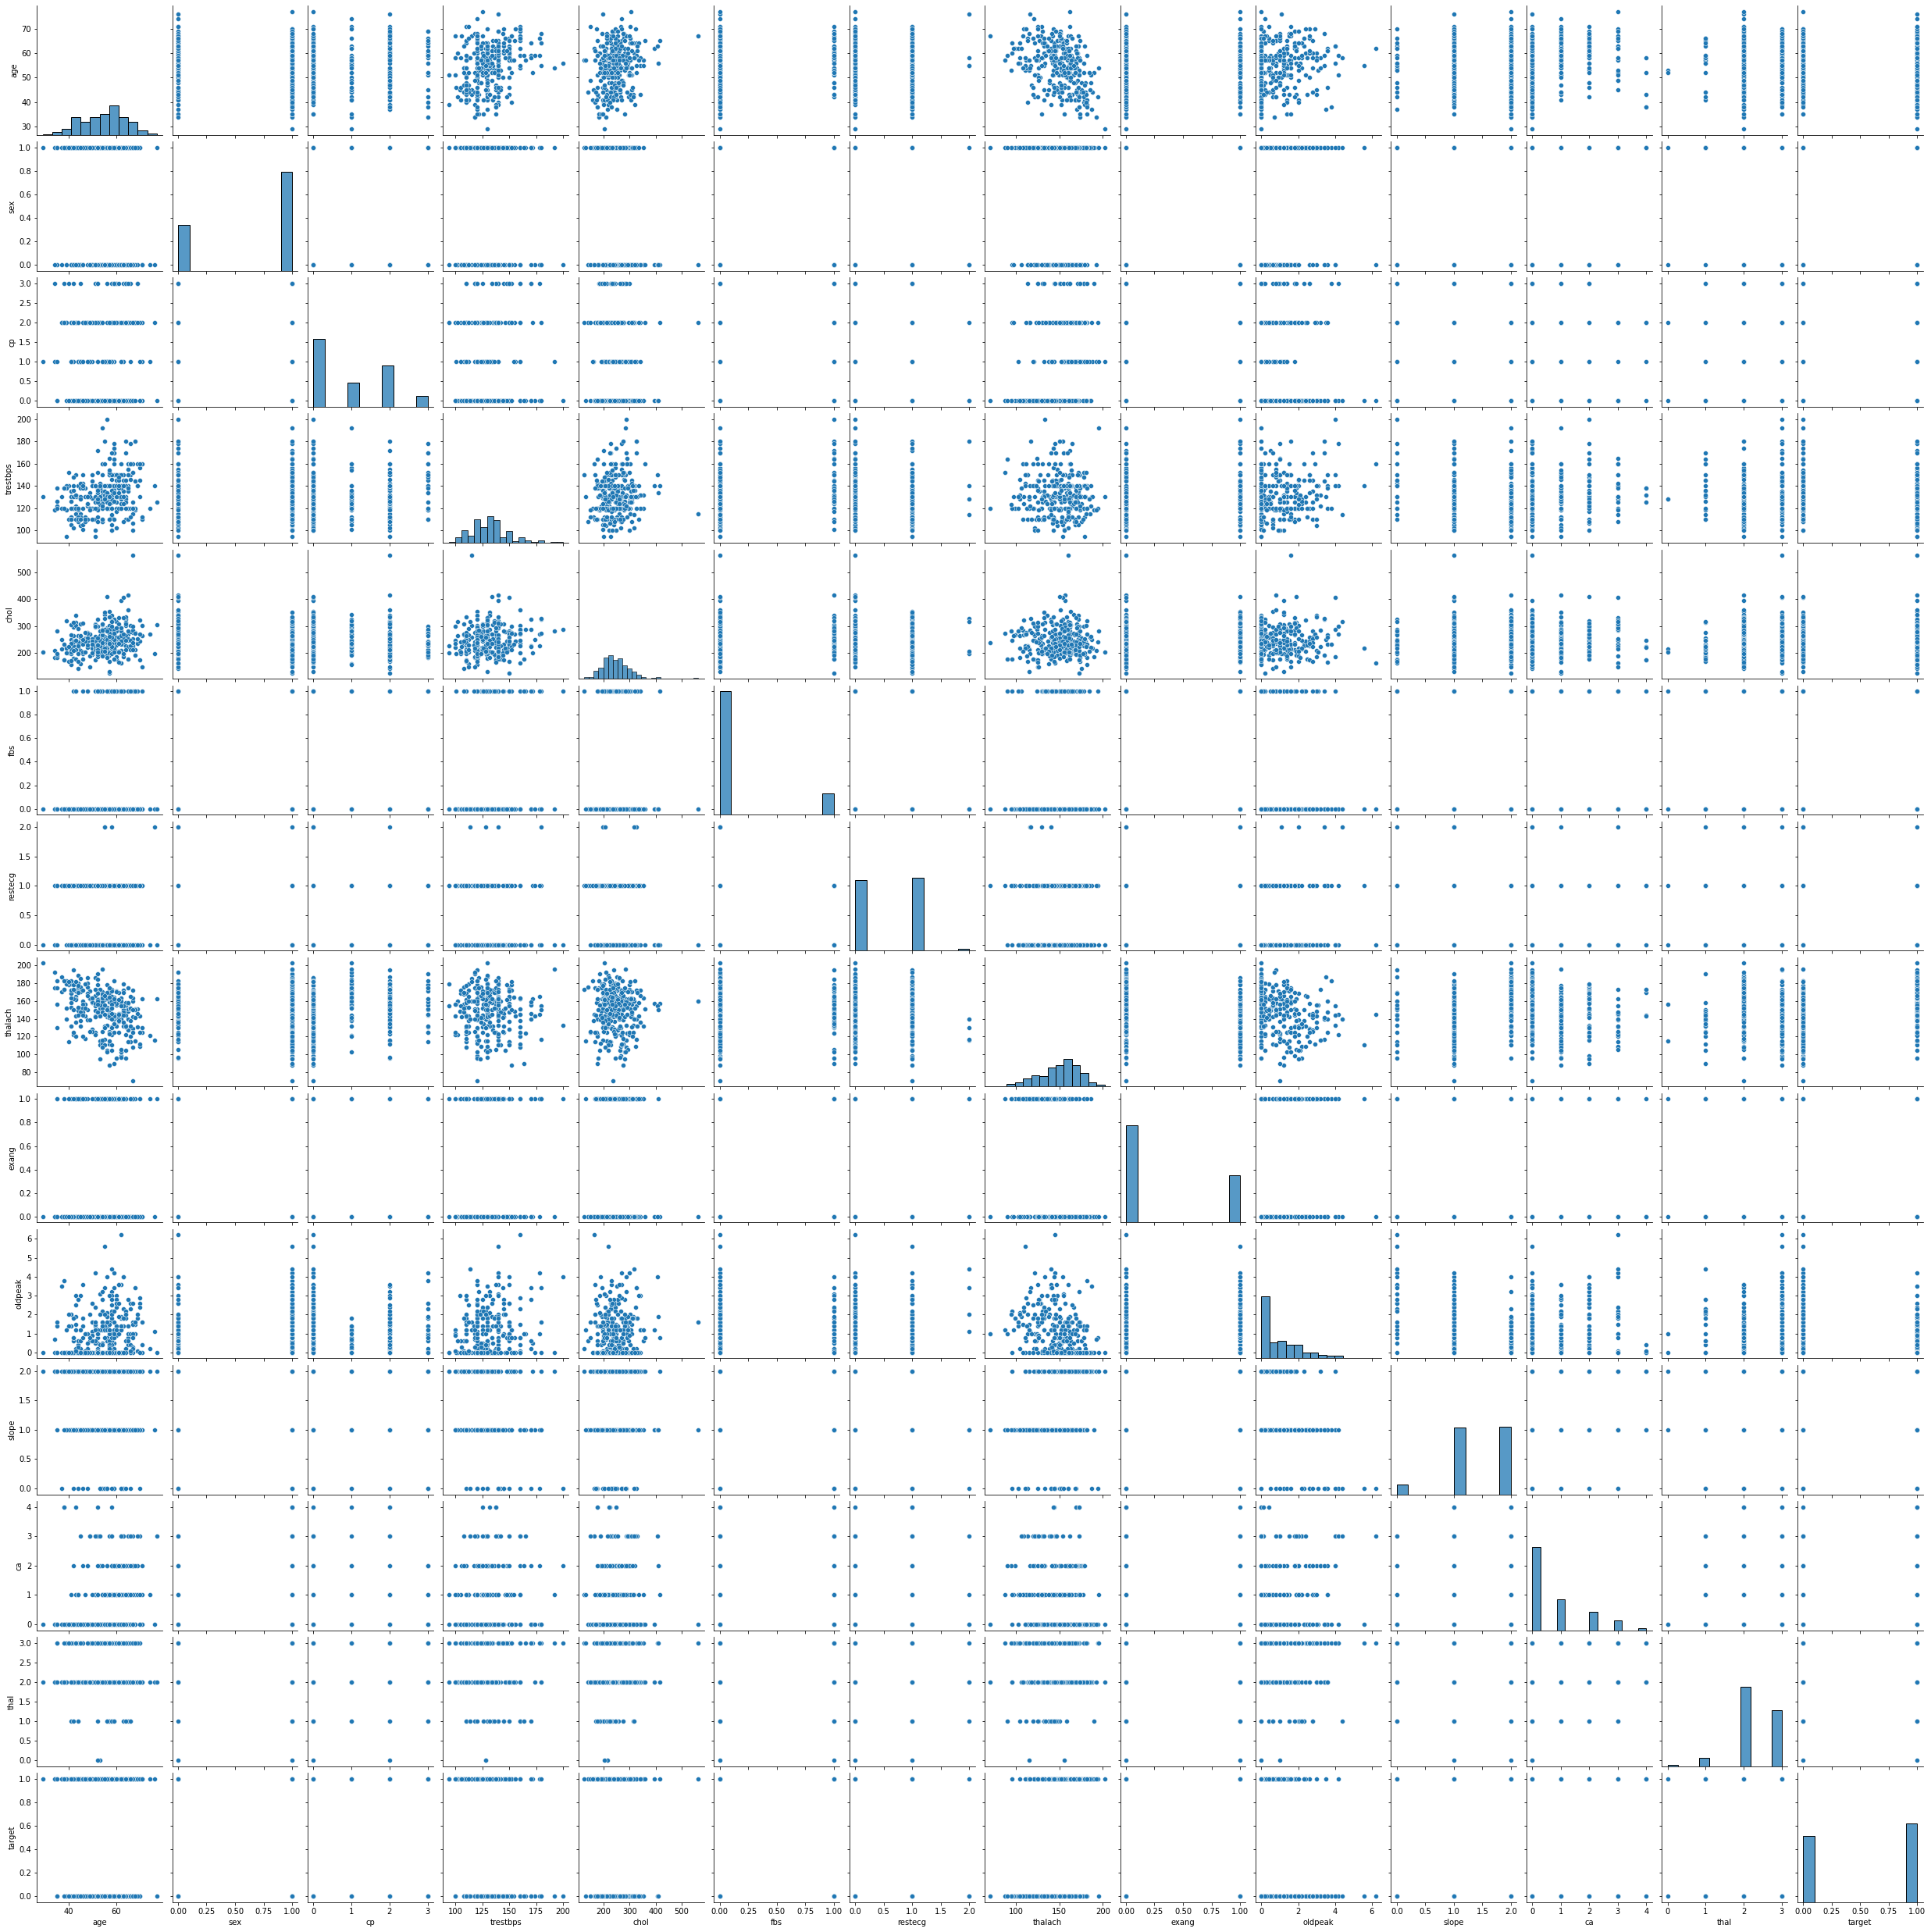

In [19]:
sns.pairplot(data)
plt.show()

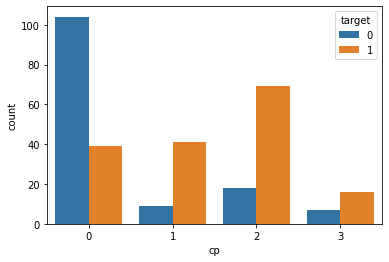

In [20]:
sns.countplot(x='cp', hue='target',data=data)
plt.show()

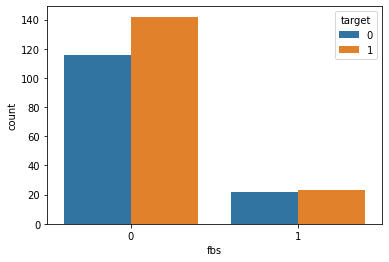

In [21]:
sns.countplot(x='fbs', hue='target',data=data)
plt.show()

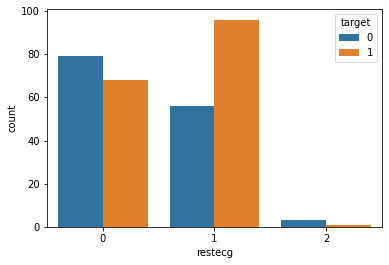

In [22]:
sns.countplot(x='restecg', hue='target',data=data)
plt.show()

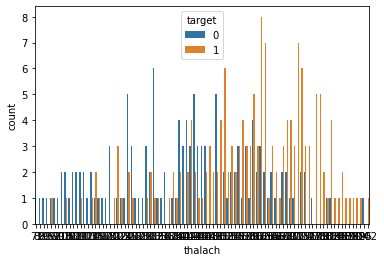

In [23]:
sns.countplot(x='thalach', hue='target',data=data)
plt.show()

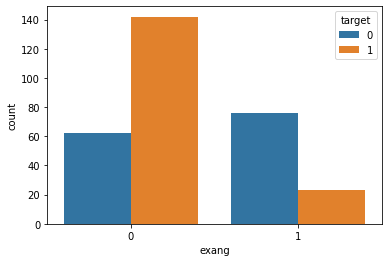

In [24]:
sns.countplot(x='exang', hue='target',data=data)
plt.show()

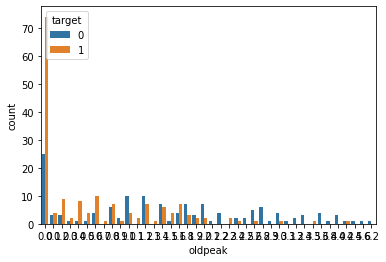

In [25]:
sns.countplot(x='oldpeak', hue='target',data=data)
plt.show()

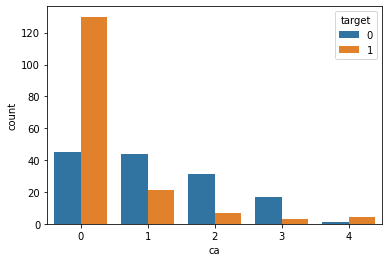

In [26]:
sns.countplot(x='ca', hue='target',data=data)
plt.show()

In [27]:
feature=data.drop(['target'],axis=1)
target=data.target
feature.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [28]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [29]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227, 13)
(76, 13)
(227,)
(76,)


In [30]:
my_logreg_model=LogisticRegression().fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
my_logreg_preds_train=my_logreg_model.predict(X_train)
my_logreg_preds_test=my_logreg_model.predict(X_test)
print('Accuracy on Train set:',accuracy_score(y_train,my_logreg_preds_train))
print('Accuracy on Test set:',accuracy_score(y_test,my_logreg_preds_test))

Accuracy on Train set: 0.8634361233480177
Accuracy on Test set: 0.7631578947368421


In [32]:
prob=list(zip(my_logreg_model.predict_proba(X_train),my_logreg_model.predict(X_train)))
prob

[(array([0.90754881, 0.09245119]), 0),
 (array([0.65620314, 0.34379686]), 0),
 (array([0.88941783, 0.11058217]), 0),
 (array([0.20670976, 0.79329024]), 1),
 (array([0.69619876, 0.30380124]), 0),
 (array([0.0310644, 0.9689356]), 1),
 (array([0.36908255, 0.63091745]), 1),
 (array([0.33530002, 0.66469998]), 1),
 (array([0.07275369, 0.92724631]), 1),
 (array([0.85749125, 0.14250875]), 0),
 (array([0.04030423, 0.95969577]), 1),
 (array([0.06677769, 0.93322231]), 1),
 (array([0.41589983, 0.58410017]), 1),
 (array([0.0484203, 0.9515797]), 1),
 (array([0.98463356, 0.01536644]), 0),
 (array([0.08598972, 0.91401028]), 1),
 (array([0.38058946, 0.61941054]), 1),
 (array([0.99727263, 0.00272737]), 0),
 (array([0.01103655, 0.98896345]), 1),
 (array([0.03701798, 0.96298202]), 1),
 (array([0.1140269, 0.8859731]), 1),
 (array([0.64189681, 0.35810319]), 0),
 (array([0.29096418, 0.70903582]), 1),
 (array([0.14231328, 0.85768672]), 1),
 (array([0.52337455, 0.47662545]), 0),
 (array([0.03745571, 0.96254429

In [33]:
print('Confusion Matrix on Train set:\n', confusion_matrix(y_train,my_logreg_preds_train))

Confusion Matrix on Train set:
 [[ 78  19]
 [ 12 118]]


In [34]:
print('Confusion Matrix on Test set:\n', confusion_matrix(y_test,my_logreg_preds_test))

Confusion Matrix on Test set:
 [[28 13]
 [ 5 30]]


In [35]:
print('Precision on Train set:',precision_score(y_train,my_logreg_preds_train))
print('Precision on Test set:',precision_score(y_test,my_logreg_preds_test))
print('\n')
print('Recall on Train set:',recall_score(y_train,my_logreg_preds_train))
print('Recall on Test set:',recall_score(y_test,my_logreg_preds_test))
print('\n')
print('F1-Score on Train set:',f1_score(y_train,my_logreg_preds_train))
print('F1-Score on Test set:',f1_score(y_test,my_logreg_preds_test))

Precision on Train set: 0.8613138686131386
Precision on Test set: 0.6976744186046512


Recall on Train set: 0.9076923076923077
Recall on Test set: 0.8571428571428571


F1-Score on Train set: 0.8838951310861423
F1-Score on Test set: 0.7692307692307693


In [36]:
print('Classification Report on Train set:')
print(classification_report(y_train,my_logreg_preds_train))

Classification Report on Train set:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        97
           1       0.86      0.91      0.88       130

    accuracy                           0.86       227
   macro avg       0.86      0.86      0.86       227
weighted avg       0.86      0.86      0.86       227



In [37]:
print('Classification Report on Test set:')
print(classification_report(y_test,my_logreg_preds_test))

Classification Report on Test set:
              precision    recall  f1-score   support

           0       0.85      0.68      0.76        41
           1       0.70      0.86      0.77        35

    accuracy                           0.76        76
   macro avg       0.77      0.77      0.76        76
weighted avg       0.78      0.76      0.76        76



In [38]:
rfc=RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [39]:
predictions=rfc.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        41
           1       0.71      0.86      0.78        35

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.79      0.78      0.78        76



In [40]:
print(confusion_matrix(y_test,predictions))

[[29 12]
 [ 5 30]]


<AxesSubplot:>

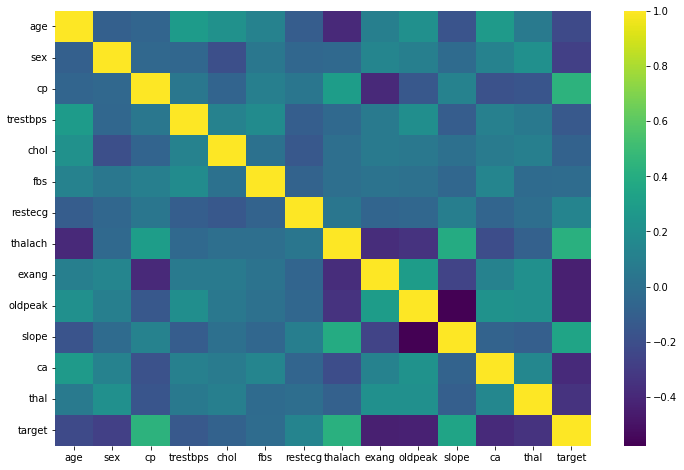

In [41]:
plt.figure(figsize=(12,8)) 
sns.heatmap(data.corr(), cmap='viridis')

<AxesSubplot:>

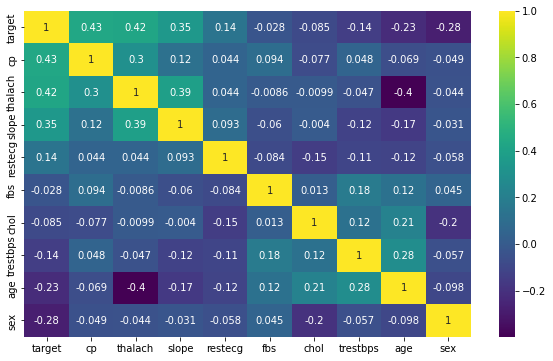

In [42]:
#Target correlation matrix
k=10 #number of variables for heatmap
cols=data.corr().nlargest(k,'target')['target'].index
cm=data[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='viridis')

In [44]:
log_reg=smf.logit("target~age+sex+cp+trestbps+chol+fbs+restecg+thalach+exang+oldpeak+slope+ca+thal",data=data).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Tue, 02 May 2023   Pseudo R-squ.:                  0.4937
Time:                        15:47:39   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.262e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4505      2.571      1.342      0.180      -1.590       8.490
age           -0.0049      0.